# Site description figures

In [1]:
import subprocess
import os

import netCDF4
import numpy as np
import glob
import time
import matplotlib.pyplot as plt
import copy
import xarray as xr
from datetime import datetime, timedelta 
from roms_regrid import *
from celluloid import Camera 
import cartopy.crs as ccrs
import seawater as sw
import pandas as pd

/tmp/ipykernel_2237279/2849830013.py:15: UserWarning: The seawater library is deprecated! Please use gsw instead.
  import seawater as sw


In [2]:
grid=xr.open_dataset('/global/cfs/cdirs/m4632/uheede/work/Iceland4_BGC/INPUT/Iceland4_grd.nc')
grid_pr=grid
h=grid['h'].values
mask_rho=grid['mask_rho'].values
pm=grid['pm'].values
pn=grid['pn'].values

In [3]:
h_regrid=roms_regrid(grid,grid_pr['h'])
mask_regrid=roms_regrid(grid,grid['mask_rho'])

In [4]:
f='/global/cfs/cdirs/m4632/uheede/Vedur_data/Grundartangi_01072024-30072024.xls'
grundartangi = pd.read_excel(f,decimal=',')
grundartangi


,Timabil,Flodatafla (m),Sjavarhaed (m),Vindur (m/s),Hvida (m/s),Vindatt (deg),Loftthrystingur (hpa),Lofthiti (degC),Sjavarhiti (degC),Selta (PSU),Unnamed: 10
0,00:00 31.07.2024,2.27,2.53,6,11,141,1004,11.3,11.7,20.04,
1,23:50 30.07.2024,2.20,2.46,6,11,149,1004,11.4,11.7,20.04,
2,23:40 30.07.2024,2.13,2.38,6,9,144,1004,11.4,11.7,20.04,
3,23:30 30.07.2024,2.06,2.32,8,13,136,1004,11.4,11.7,20.04,
4,23:20 30.07.2024,1.99,2.25,7,14,148,1004,11.4,11.5,20.04,
...,...,...,...,...,...,...,...,...,...,...,...
4316,00:40 01.07.2024,3.09,3.59,10,14,209,996,9.8,10.6,20.04,
4317,00:30 01.07.2024,3.03,3.53,9,12,214,996,9.9,10.6,20.04,
4318,00:20 01.07.2024,2.97,3.43,9,12,210,996,9.9,10.6,20.04,
4319,00:10 01.07.2024,2.90,3.36,9,11,202,996,10.0,10.6,20.04,


In [5]:
time =grundartangi[' Timabil ']
time=time.str.strip()
time = pd.to_datetime(time, format="%H:%M\n%d.%m.%Y",dayfirst=True)
time

0      2024-07-31 00:00:00
1      2024-07-30 23:50:00
2      2024-07-30 23:40:00
3      2024-07-30 23:30:00
4      2024-07-30 23:20:00
               ...        
4316   2024-07-01 00:40:00
4317   2024-07-01 00:30:00
4318   2024-07-01 00:20:00
4319   2024-07-01 00:10:00
4320   2024-07-01 00:00:00
Name:  Timabil , Length: 4321, dtype: datetime64[ns]

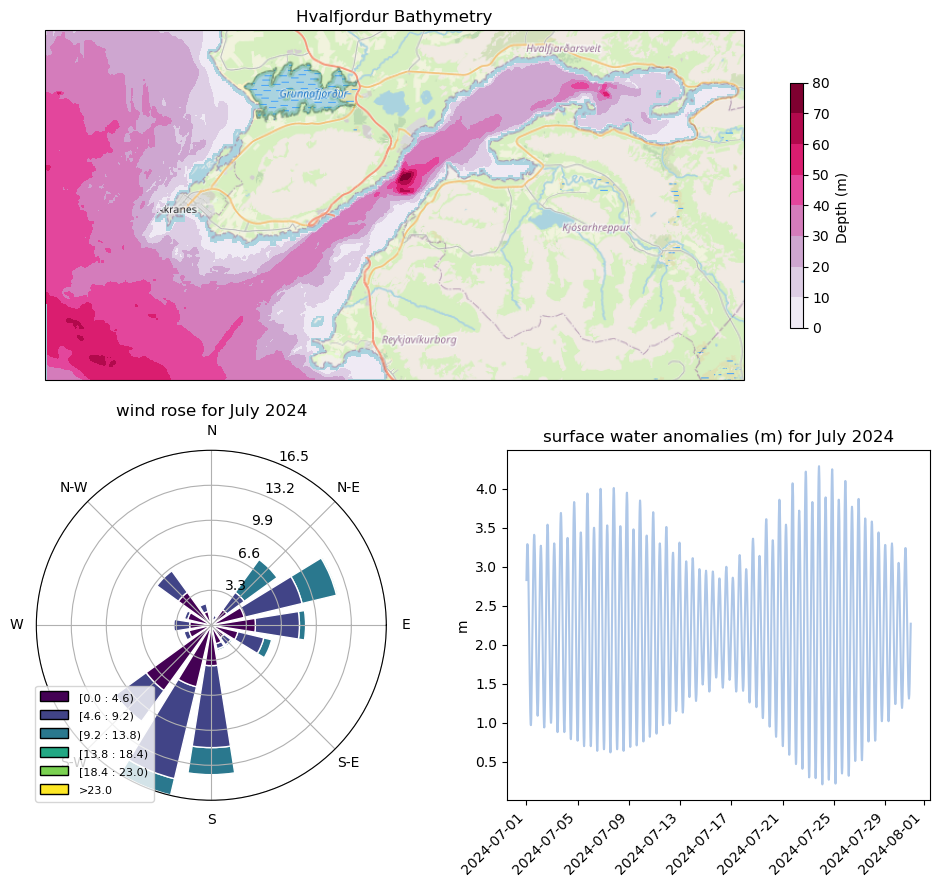

In [6]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

# Define the basemap
request = cimgt.OSM()
extent = [-22.2543190362897, -21.3469394652069, 64.22114671, 64.41802068]

# Create figure with GridSpec: 2 rows, 2 columns
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])

# Top row: span both columns
ax1 = fig.add_subplot(gs[0, :], projection=request.crs)
ax1.set_extent(extent)
ax1.add_image(request, 10)
ax1.set_title("Hvalfjordur Bathymetry")

# Your contourf plot
cf1 = ax1.contourf(
    h_regrid.lon,
    h_regrid.lat,
    h_regrid.where(mask_regrid != 0),
    transform=ccrs.PlateCarree(),
    cmap="PuRd"
)

# Add colorbar
cbar = fig.colorbar(cf1, ax=ax1, orientation="vertical", shrink=0.7, pad=0.05)
cbar.set_label("Depth (m) ")

# Bottom row

from windrose import WindroseAxes
ax2 = WindroseAxes(fig, gs[1, 0])
fig.add_axes(ax2)  

ax2.bar(grundartangi['Vindatt (deg)'], grundartangi['Vindur (m/s)'], normed=True, opening=0.8, edgecolor='white')
ax2.set_legend()
ax2.set_title('wind rose for July 2024')

palette = plt.get_cmap('tab20')
ax3 = fig.add_subplot(gs[1, 1])
ax3.set_title('surface water anomalies (m) for July 2024')
ax3.plot(time,grundartangi[' Flodatafla (m)'],color=palette(1))
ax3.set_ylabel('m')
#ax3.set_xlabel('time')
plt.setp(ax3.get_xticklabels(), rotation=45, ha="right")

#plt.tight_layout()
plt.show()


In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import cartopy.mpl.ticker as cticker

# Define the basemap
request = cimgt.OSM()
extent = [-22.2543190362897, -21.3469394652069, 64.22114671, 64.41802068]

# Create figure with GridSpec: 2 rows, 2 columns
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])

# Top row: span both columns
ax1 = fig.add_subplot(gs[0, :], projection=request.crs)
ax1.set_extent(extent)
ax1.add_image(request, 10)
ax1.set_title("Hvalfjörður Bathymetry")

# Your contourf plot
cf1 = ax1.contourf(
    h_regrid.lon,
    h_regrid.lat,
    h_regrid.where(mask_regrid != 0),
    transform=ccrs.PlateCarree(),
    cmap="PuRd"
)

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker

# --------------------
# Panel 1 — Surface vectors
# --------------------
ax = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')

ax.quiver(
    lon_thin, lat_thin,
    u_surf0_thin, v_surf0_thin,
    transform=ccrs.PlateCarree()
)
ax.set_title("Surface velocity vectors (thinned)")

# ---- CUSTOM LAT/LON TICKS ----
ax.set_xticks([-22.2, -22.0, -21.8, -21.6, -21.4], crs=ccrs.PlateCarree())
ax.set_yticks([64.24, 64.28, 64.32, 64.36, 64.40], crs=ccrs.PlateCarree())

lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.tick_params(labelbottom=True, labelright=False, bottom=True, right=False)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")


# --------------------
# Panel 2 — 20 m vectors
# --------------------
ax = plt.subplot(2, 2, 2, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')

ax.quiver(
    lon_thin, lat_thin,
    u_200_thin, v_200_thin,
    transform=ccrs.PlateCarree(),
    color='red'
)
ax.set_title("20 m velocity vectors (thinned)")

# ---- SAME TICKS FOR CONSISTENCY ----
ax.set_xticks([-22.2, -22.0, -21.8, -21.6, -21.4], crs=ccrs.PlateCarree())
ax.set_yticks([64.24, 64.28, 64.32, 64.36, 64.40], crs=ccrs.PlateCarree())

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.tick_params(labelbottom=True, labelright=False, bottom=True, right=False)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")


# Bottom row
from windrose import WindroseAxes
ax2 = WindroseAxes(fig, gs[1, 0])
fig.add_axes(ax2)

ax2.bar(grundartangi['Vindatt (deg)'], grundartangi['Vindur (m/s)'],
        normed=True, opening=0.8, edgecolor='white')
ax2.set_legend()
ax2.set_title('Wind rose for July 2024')

palette = plt.get_cmap('tab20')
ax3 = fig.add_subplot(gs[1, 1])
ax3.set_title('Surface water anomalies (m) for July 2024')
ax3.plot(time, grundartangi[' Flodatafla (m)'], color=palette(1))
ax3.set_ylabel('m')
plt.setp(ax3.get_xticklabels(), rotation=45, ha="right")

# Add subplot labels (a), (b), (c)
ax1.text(0.01, 0.99, "(a)", transform=ax1.transAxes, fontsize=14, va="top", ha="left", fontweight="bold")
ax2.text(0.01, 0.99, "(b)", transform=ax2.transAxes, fontsize=14, va="top", ha="left", fontweight="bold")
ax3.text(0.01, 0.99, "(c)", transform=ax3.transAxes, fontsize=14, va="top", ha="left", fontweight="bold")

plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'matplotlib'

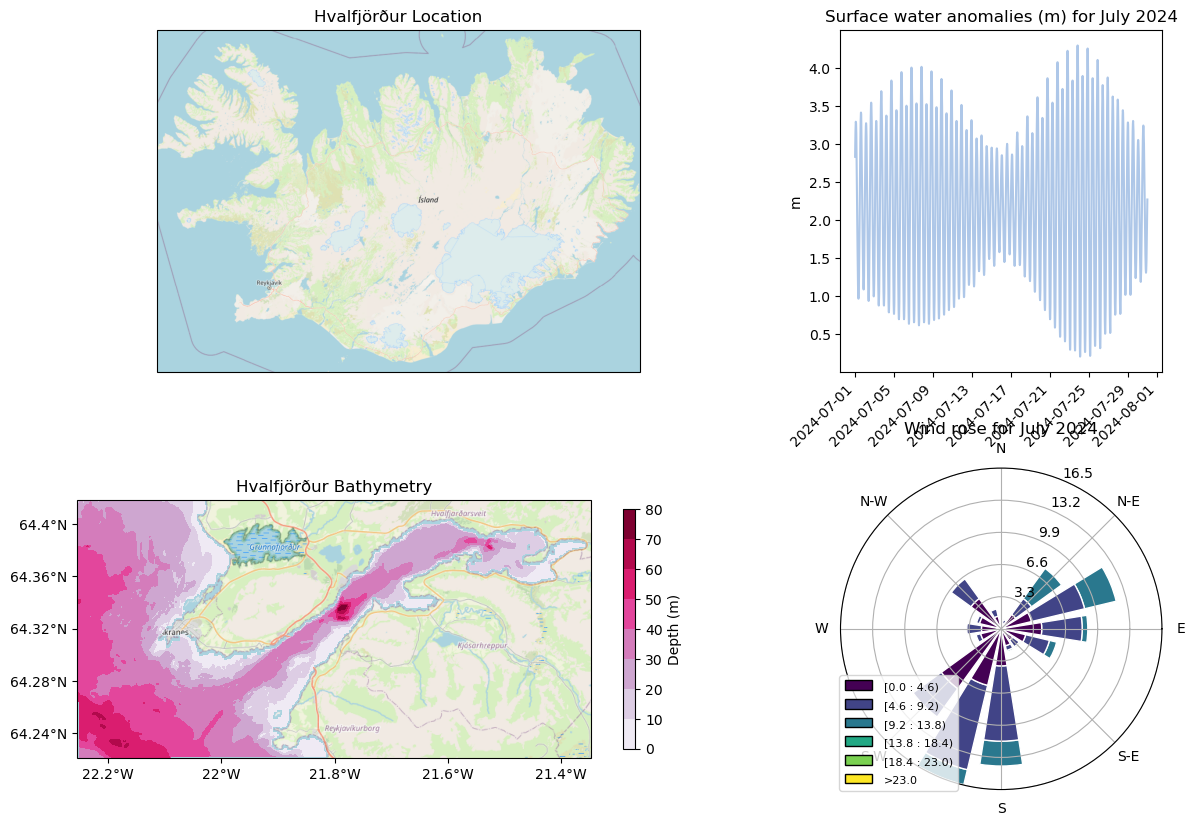

In [14]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from windrose import WindroseAxes

# Define the basemap
request = cimgt.OSM()
extent = [-22.2543190362897, -21.3469394652069, 64.22114671, 64.41802068]

extent2 = [-24.5, -13.5, 63.3, 66.6]

# Create figure with GridSpec: 2 rows, 2 columns, with unequal widths
fig = plt.figure(figsize=(14, 10))
gs = fig.add_gridspec(2, 2, width_ratios=[2, 1], height_ratios=[1, 1], wspace=0.25, hspace=0.25)

# --- Left column: Bathymetry maps ---

ax_map = fig.add_subplot(gs[0, 0], projection=request.crs)
ax_map.set_extent(extent2)
ax_map.add_image(request, 7)
ax_map.set_title(f"Hvalfjörður Location")


ax_bat = fig.add_subplot(gs[1, 0], projection=request.crs)
ax_bat.set_extent(extent)
ax_bat.add_image(request, 10)
ax_bat.set_title(f"Hvalfjörður Bathymetry")
# Bathymetry contourf
cf = ax_bat.contourf(
     h_regrid.lon,
     h_regrid.lat,
     h_regrid.where(mask_regrid != 0),
     transform=ccrs.PlateCarree(),
      cmap="PuRd"
)
ax_bat.set_xticks([-22.2, -22.0, -21.8, -21.6, -21.4], crs=ccrs.PlateCarree())
ax_bat.set_yticks([64.24, 64.28, 64.32, 64.36, 64.40], crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
ax_bat.xaxis.set_major_formatter(lon_formatter)
ax_bat.yaxis.set_major_formatter(lat_formatter)


cbar = fig.colorbar(cf, ax=ax_bat, orientation="vertical", shrink=0.7, pad=0.05)
cbar.set_label("Depth (m)")

# --- Right column top: Sea level anomalies ---
palette = plt.get_cmap('tab20')
ax_sea = fig.add_subplot(gs[0, 1])
ax_sea.set_title('Surface water anomalies (m) for July 2024')
ax_sea.plot(time, grundartangi[' Flodatafla (m)'], color=palette(1))
ax_sea.set_ylabel('m')
plt.setp(ax_sea.get_xticklabels(), rotation=45, ha="right")

# --- Right column bottom: Wind rose ---
ax_wind = WindroseAxes(fig, gs[1, 1])
fig.add_axes(ax_wind)  
ax_wind.bar(
    grundartangi['Vindatt (deg)'],
    grundartangi['Vindur (m/s)'],
    normed=True, opening=0.8, edgecolor='white'
)
ax_wind.set_legend()
ax_wind.set_title('Wind rose for July 2024')

plt.show()



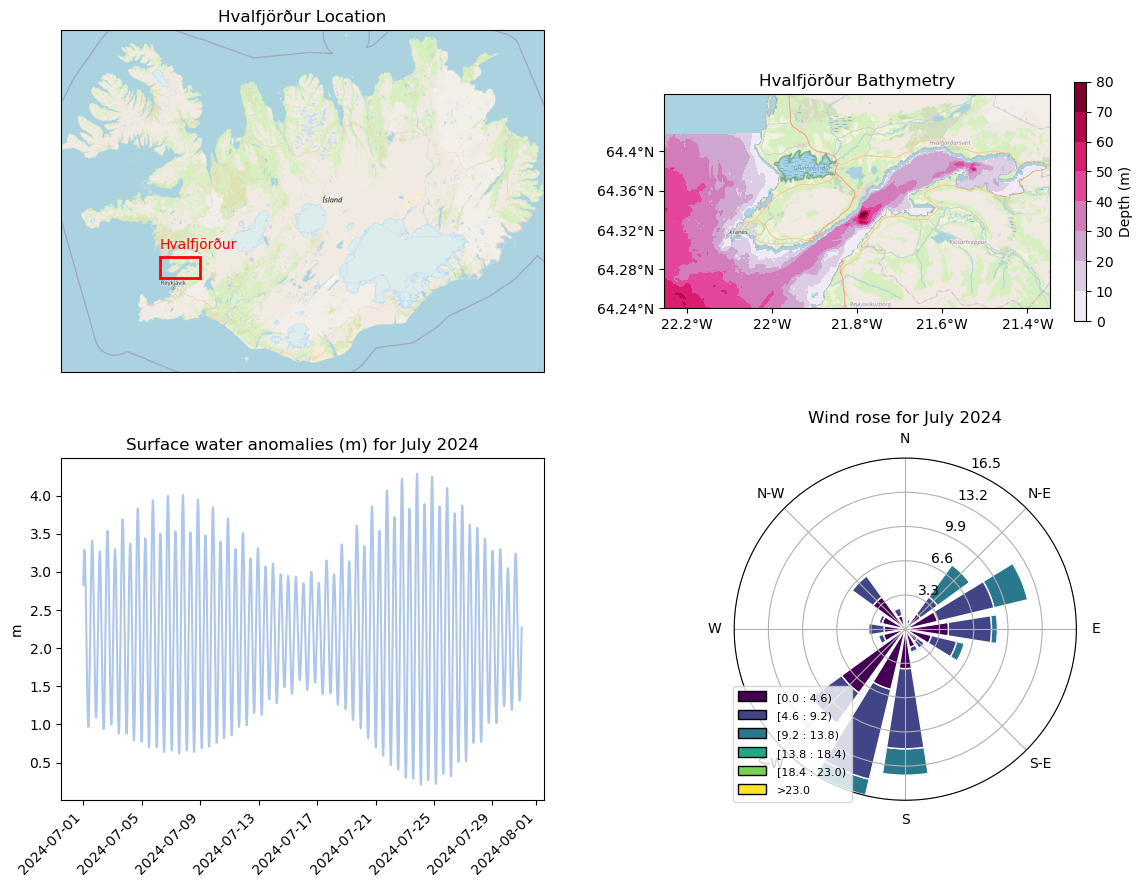

In [18]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import cartopy.mpl.ticker as cticker
from matplotlib.patches import Rectangle
from windrose import WindroseAxes

# Define the basemap
request = cimgt.OSM()

# Extents
extent_hval = [-22.2543190362897, -21.3469394652069, 64.25114671, 64.45802068]  # Hvalfjörður zoom
extent_iceland = [-24.5, -13.5, 63.3, 66.6]  # Iceland

# Create figure with GridSpec: 2 rows, 2 columns
fig = plt.figure(figsize=(14, 10))
gs = fig.add_gridspec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1], wspace=0.25, hspace=0.25)

# --- Top left: Iceland map with box ---
ax_map = fig.add_subplot(gs[0, 0], projection=request.crs)
ax_map.set_extent(extent_iceland)
ax_map.add_image(request, 7)
ax_map.set_title("Hvalfjörður Location")

# Add rectangle showing Hvalfjörður extent
rect = Rectangle(
    (extent_hval[0], extent_hval[2]),  # bottom-left corner (lon, lat)
    extent_hval[1] - extent_hval[0],   # width (lon range)
    extent_hval[3] - extent_hval[2],   # height (lat range)
    linewidth=2, edgecolor='red', facecolor='none', transform=ccrs.PlateCarree()
)
ax_map.add_patch(rect)
ax_map.text(
    extent_hval[0], extent_hval[3] + 0.05,
    "Hvalfjörður",
    transform=ccrs.PlateCarree(),
    fontsize=10, color='red', ha='left', va='bottom'
)

# --- Top right: Hvalfjörður Bathymetry ---
ax_bat = fig.add_subplot(gs[0, 1], projection=request.crs)
ax_bat.set_extent(extent_hval)
ax_bat.add_image(request, 10)
ax_bat.set_title("Hvalfjörður Bathymetry")

# Bathymetry contourf
cf = ax_bat.contourf(
    h_regrid.lon,
    h_regrid.lat,
    h_regrid.where(mask_regrid != 0),
    transform=ccrs.PlateCarree(),
    cmap="PuRd"
)

# Format ticks
ax_bat.set_xticks([-22.2, -22.0, -21.8, -21.6, -21.4], crs=ccrs.PlateCarree())
ax_bat.set_yticks([64.24, 64.28, 64.32, 64.36, 64.40], crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
ax_bat.xaxis.set_major_formatter(lon_formatter)
ax_bat.yaxis.set_major_formatter(lat_formatter)

# Colorbar
cbar = fig.colorbar(cf, ax=ax_bat, orientation="vertical", shrink=0.7, pad=0.05)
cbar.set_label("Depth (m)")

# --- Bottom left: Sea level anomalies ---
palette = plt.get_cmap('tab20')
ax_sea = fig.add_subplot(gs[1, 0])
ax_sea.set_title("Surface water anomalies (m) for July 2024")
ax_sea.plot(time, grundartangi[' Flodatafla (m)'], color=palette(1))
ax_sea.set_ylabel("m")
plt.setp(ax_sea.get_xticklabels(), rotation=45, ha="right")

# --- Bottom right: Wind rose ---
ax_wind = WindroseAxes(fig, gs[1, 1])
fig.add_axes(ax_wind)
ax_wind.bar(
    grundartangi['Vindatt (deg)'],
    grundartangi['Vindur (m/s)'],
    normed=True, opening=0.8, edgecolor="white"
)
ax_wind.set_legend()
ax_wind.set_title("Wind rose for July 2024")

plt.show()


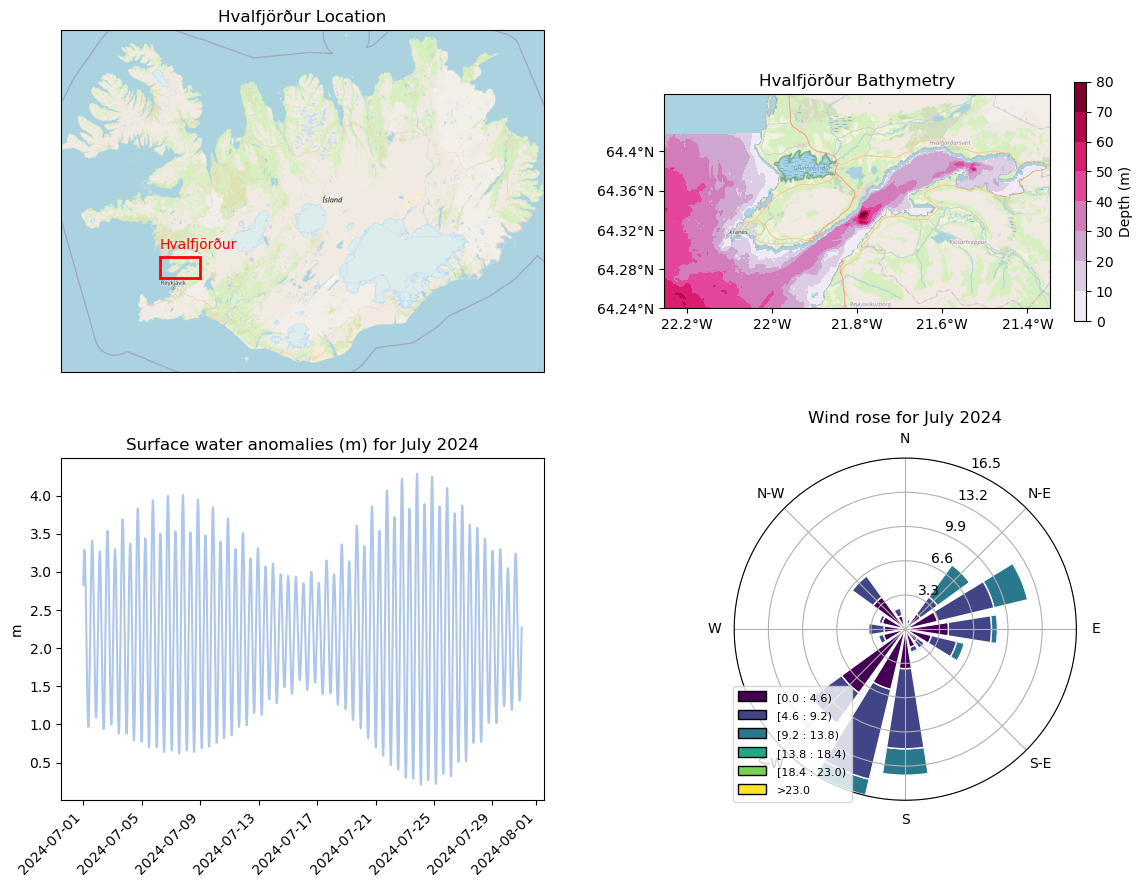

In [18]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import cartopy.mpl.ticker as cticker
from matplotlib.patches import Rectangle
from windrose import WindroseAxes

# Define the basemap
request = cimgt.OSM()

# Extents
extent_hval = [-22.2543190362897, -21.3469394652069, 64.25114671, 64.45802068]  # Hvalfjörður zoom
extent_iceland = [-24.5, -13.5, 63.3, 66.6]  # Iceland

# Create figure with GridSpec: 2 rows, 2 columns
fig = plt.figure(figsize=(14, 10))
gs = fig.add_gridspec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1], wspace=0.25, hspace=0.25)

# --- Top left: Iceland map with box ---
ax_map = fig.add_subplot(gs[0, 0], projection=request.crs)
ax_map.set_extent(extent_iceland)
ax_map.add_image(request, 7)
ax_map.set_title("Hvalfjörður Location")

# Add rectangle showing Hvalfjörður extent
rect = Rectangle(
    (extent_hval[0], extent_hval[2]),  # bottom-left corner (lon, lat)
    extent_hval[1] - extent_hval[0],   # width (lon range)
    extent_hval[3] - extent_hval[2],   # height (lat range)
    linewidth=2, edgecolor='red', facecolor='none', transform=ccrs.PlateCarree()
)
ax_map.add_patch(rect)
ax_map.text(
    extent_hval[0], extent_hval[3] + 0.05,
    "Hvalfjörður",
    transform=ccrs.PlateCarree(),
    fontsize=10, color='red', ha='left', va='bottom'
)

# --- Top right: Hvalfjörður Bathymetry ---
ax_bat = fig.add_subplot(gs[0, 1], projection=request.crs)
ax_bat.set_extent(extent_hval)
ax_bat.add_image(request, 10)
ax_bat.set_title("Hvalfjörður Bathymetry")

# Bathymetry contourf
cf = ax_bat.contourf(
    h_regrid.lon,
    h_regrid.lat,
    h_regrid.where(mask_regrid != 0),
    transform=ccrs.PlateCarree(),
    cmap="PuRd"
)

# Format ticks
ax_bat.set_xticks([-22.2, -22.0, -21.8, -21.6, -21.4], crs=ccrs.PlateCarree())
ax_bat.set_yticks([64.24, 64.28, 64.32, 64.36, 64.40], crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
ax_bat.xaxis.set_major_formatter(lon_formatter)
ax_bat.yaxis.set_major_formatter(lat_formatter)

# Colorbar
cbar = fig.colorbar(cf, ax=ax_bat, orientation="vertical", shrink=0.7, pad=0.05)
cbar.set_label("Depth (m)")

# --- Bottom left: Sea level anomalies ---
palette = plt.get_cmap('tab20')
ax_sea = fig.add_subplot(gs[1, 0])
ax_sea.set_title("Surface water anomalies (m) for July 2024")
ax_sea.plot(time, grundartangi[' Flodatafla (m)'], color=palette(1))
ax_sea.set_ylabel("m")
plt.setp(ax_sea.get_xticklabels(), rotation=45, ha="right")

# --- Bottom right: Wind rose ---
ax_wind = WindroseAxes(fig, gs[1, 1])
fig.add_axes(ax_wind)
ax_wind.bar(
    grundartangi['Vindatt (deg)'],
    grundartangi['Vindur (m/s)'],
    normed=True, opening=0.8, edgecolor="white"
)
ax_wind.set_legend()
ax_wind.set_title("Wind rose for July 2024")

plt.show()


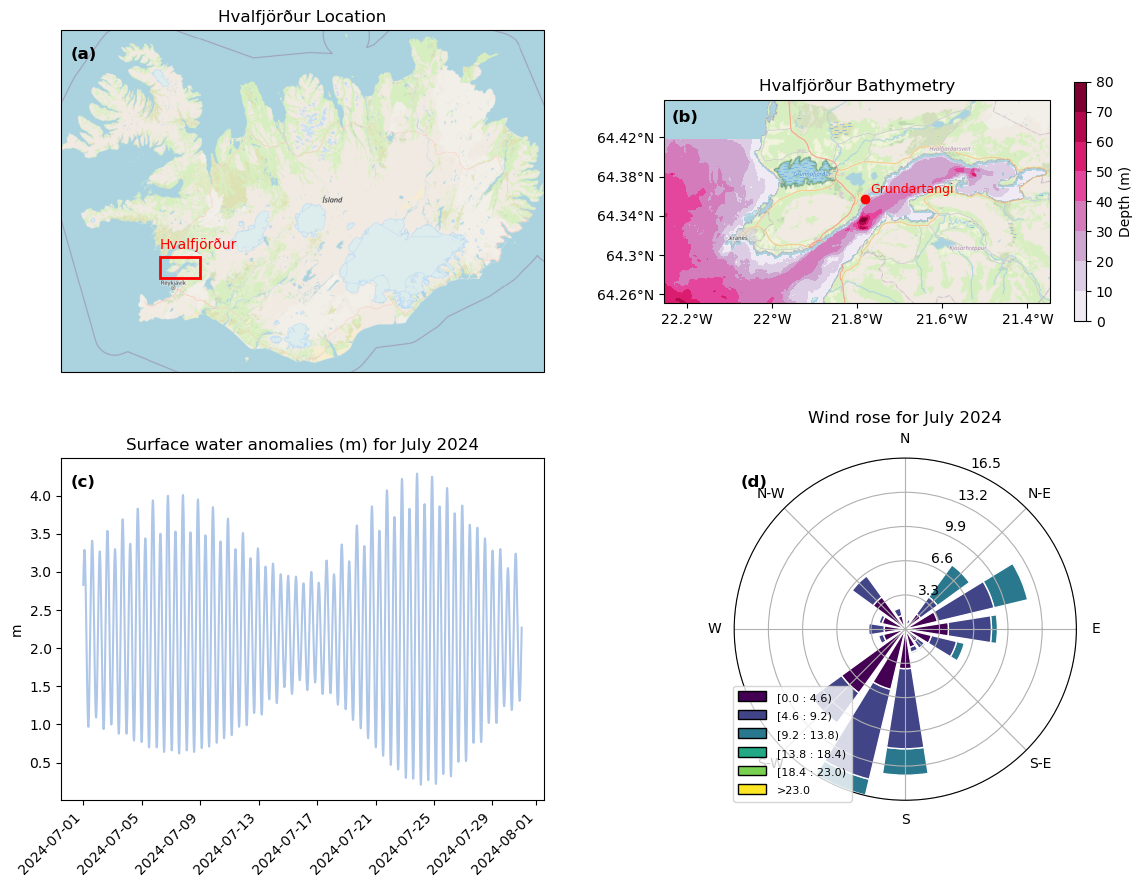

In [19]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import cartopy.mpl.ticker as cticker
from matplotlib.patches import Rectangle
from windrose import WindroseAxes

# Define the basemap
request = cimgt.OSM()

# Extents
extent_hval = [-22.2543190362897, -21.3469394652069, 64.25114671, 64.45802068]  # Hvalfjörður zoom
extent_iceland = [-24.5, -13.5, 63.3, 66.6]  # Iceland

# Create figure with GridSpec: 2 rows, 2 columns
fig = plt.figure(figsize=(14, 10))
gs = fig.add_gridspec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1], wspace=0.25, hspace=0.25)

# --- Top left: Iceland map with box ---
ax_map = fig.add_subplot(gs[0, 0], projection=request.crs)
ax_map.set_extent(extent_iceland)
ax_map.add_image(request, 7)
ax_map.set_title("Hvalfjörður Location")

# Add rectangle showing Hvalfjörður extent
rect = Rectangle(
    (extent_hval[0], extent_hval[2]),  # bottom-left corner (lon, lat)
    extent_hval[1] - extent_hval[0],   # width (lon range)
    extent_hval[3] - extent_hval[2],   # height (lat range)
    linewidth=2, edgecolor='red', facecolor='none', transform=ccrs.PlateCarree()
)
ax_map.add_patch(rect)
ax_map.text(
    extent_hval[0], extent_hval[3] + 0.05,
    "Hvalfjörður",
    transform=ccrs.PlateCarree(),
    fontsize=10, color='red', ha='left', va='bottom'
)

# Panel label
ax_map.text(0.02, 0.95, "(a)", transform=ax_map.transAxes,
            fontsize=12, fontweight="bold", va="top", ha="left")

# --- Top right: Hvalfjörður Bathymetry ---
ax_bat = fig.add_subplot(gs[0, 1], projection=request.crs)
ax_bat.set_extent(extent_hval)
ax_bat.add_image(request, 10)
ax_bat.set_title("Hvalfjörður Bathymetry")

# Bathymetry contourf
cf = ax_bat.contourf(
    h_regrid.lon,
    h_regrid.lat,
    h_regrid.where(mask_regrid != 0),
    transform=ccrs.PlateCarree(),
    cmap="PuRd"
)

# Mark Grundartangi
ax_bat.plot(-21.7825, 64.3572, marker="o", color="red", markersize=6,
            transform=ccrs.PlateCarree())
ax_bat.text(-21.77, 64.36, "Grundartangi", color="red", fontsize=9,
            transform=ccrs.PlateCarree(), ha="left", va="bottom")

# Format ticks
ax_bat.set_xticks([-22.2, -22.0, -21.8, -21.6, -21.4], crs=ccrs.PlateCarree())
ax_bat.set_yticks([64.26, 64.30, 64.34, 64.38, 64.42], crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
ax_bat.xaxis.set_major_formatter(lon_formatter)
ax_bat.yaxis.set_major_formatter(lat_formatter)

# Colorbar
cbar = fig.colorbar(cf, ax=ax_bat, orientation="vertical", shrink=0.7, pad=0.05)
cbar.set_label("Depth (m)")

# Panel label
ax_bat.text(0.02, 0.95, "(b)", transform=ax_bat.transAxes,
            fontsize=12, fontweight="bold", va="top", ha="left")

# --- Bottom left: Sea level anomalies ---
palette = plt.get_cmap('tab20')
ax_sea = fig.add_subplot(gs[1, 0])
ax_sea.set_title("Surface water anomalies (m) for July 2024")
ax_sea.plot(time, grundartangi[' Flodatafla (m)'], color=palette(1))
ax_sea.set_ylabel("m")
plt.setp(ax_sea.get_xticklabels(), rotation=45, ha="right")

# Panel label
ax_sea.text(0.02, 0.95, "(c)", transform=ax_sea.transAxes,
            fontsize=12, fontweight="bold", va="top", ha="left")

# --- Bottom right: Wind rose ---
ax_wind = WindroseAxes(fig, gs[1, 1])
fig.add_axes(ax_wind)
ax_wind.bar(
    grundartangi['Vindatt (deg)'],
    grundartangi['Vindur (m/s)'],
    normed=True, opening=0.8, edgecolor="white"
)
ax_wind.set_legend()
ax_wind.set_title("Wind rose for July 2024")

# Panel label
ax_wind.text(0.02, 0.95, "(d)", transform=ax_wind.transAxes,
             fontsize=12, fontweight="bold", va="top", ha="left")

plt.show()
